In [1]:
import math
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
df = pd.read_csv(r"E:\sem 4\data science\assignment\ipl\IPL_ball_by_ball_updated.csv")


In [3]:
# Standardize Column Names
df.columns = df.columns.str.strip().str.lower()
print("\nColumns After Standardization:\n", df.columns.tolist())


Columns After Standardization:
 ['match_id', 'season', 'start_date', 'venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type', 'other_player_dismissed']


In [4]:
# Handle Missing Values
df.fillna({'player_dismissed': 'Not Out'}, inplace=True)
df.dropna(subset=['striker', 'bowler'], inplace=True)
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     236163
noballs                   242797
byes                      243187
legbyes                   240037
penalty                   243813
wicket_type               231748
player_dismissed               0
other_wicket_type         243815
other_player_dismissed    243815
dtype: int64


In [5]:
# Remove Duplicates
print("\nDuplicate Rows Before Removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate Rows After Removal:", df.duplicated().sum())


Duplicate Rows Before Removal: 0
Duplicate Rows After Removal: 0


In [6]:
print(df.columns)


Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')


In [7]:
# Convert Data Types
df['match_id'] = df['match_id'].astype(int)
df['innings'] = df['innings'].astype(int)
df['ball'] = df['ball'].astype(float)
df['runs_off_bat'] = pd.to_numeric(df['runs_off_bat'])
df['extras'] = pd.to_numeric(df['extras'])

if 'start_date' in df.columns:
    df['start_date'] = pd.to_datetime(df['start_date'])
    
print("\nUpdated Data Types:\n", df.dtypes)


Updated Data Types:
 match_id                           int32
season                             int64
start_date                datetime64[ns]
venue                             object
innings                            int32
ball                             float64
batting_team                      object
bowling_team                      object
striker                           object
non_striker                       object
bowler                            object
runs_off_bat                       int64
extras                             int64
wides                            float64
noballs                          float64
byes                             float64
legbyes                          float64
penalty                          float64
wicket_type                       object
player_dismissed                  object
other_wicket_type                float64
other_player_dismissed           float64
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243815 entries, 0 to 243814
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   match_id                243815 non-null  int32         
 1   season                  243815 non-null  int64         
 2   start_date              243815 non-null  datetime64[ns]
 3   venue                   243815 non-null  object        
 4   innings                 243815 non-null  int32         
 5   ball                    243815 non-null  float64       
 6   batting_team            243815 non-null  object        
 7   bowling_team            243815 non-null  object        
 8   striker                 243815 non-null  object        
 9   non_striker             243815 non-null  object        
 10  bowler                  243815 non-null  object        
 11  runs_off_bat            243815 non-null  int64         
 12  extras                  243815

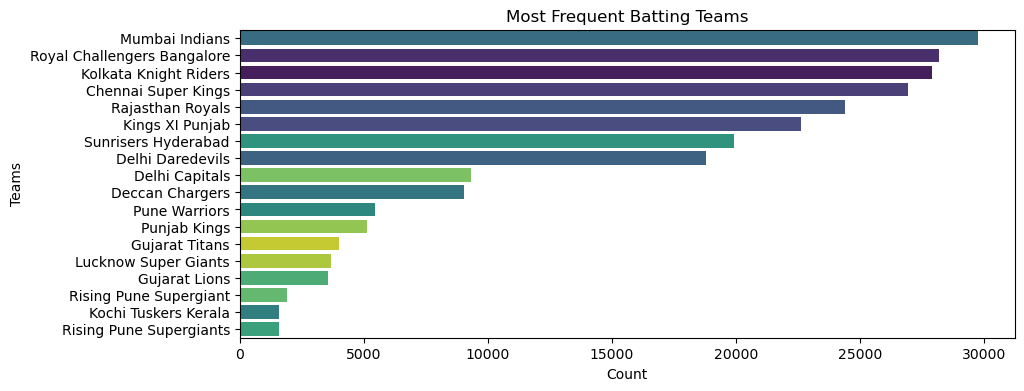

In [9]:
plt.figure(figsize=(10, 4))
sns.countplot(y=df['batting_team'], order=df['batting_team'].value_counts().index, hue=df['batting_team'], palette="viridis", legend=False)
plt.title("Most Frequent Batting Teams")
plt.xlabel("Count")
plt.ylabel("Teams")
plt.show()


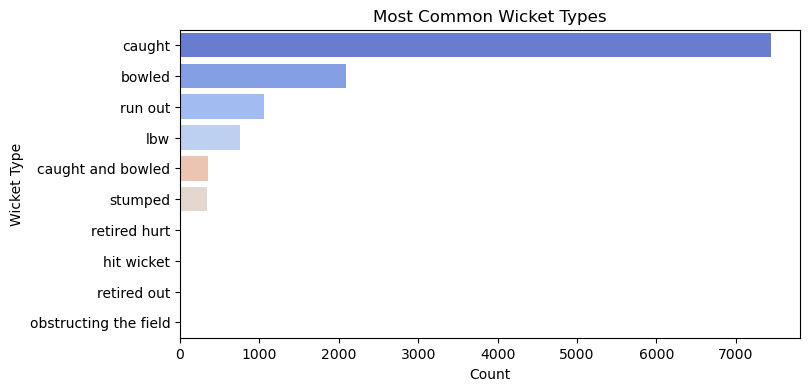

In [10]:
#  Most Common Dismissal Types
plt.figure(figsize=(8, 4))
sns.countplot(y=df['wicket_type'], order=df['wicket_type'].value_counts().index, hue=df['wicket_type'], palette="coolwarm", legend=False)
plt.title("Most Common Wicket Types")
plt.xlabel("Count")
plt.ylabel("Wicket Type")
plt.show()

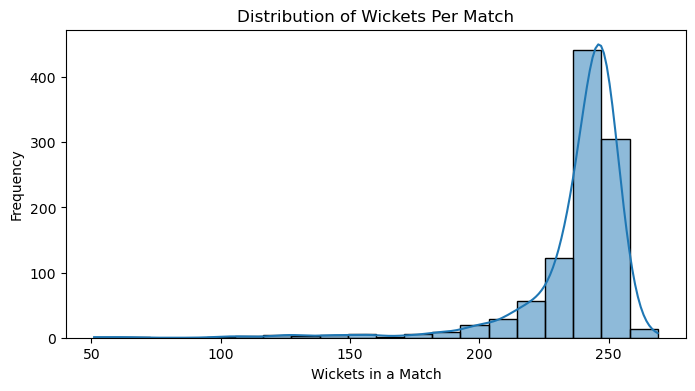

In [11]:
wickets_per_match = df.groupby('match_id')['player_dismissed'].count()
plt.figure(figsize=(8, 4))
sns.histplot(wickets_per_match, bins=20, kde=True)
plt.title("Distribution of Wickets Per Match")
plt.xlabel("Wickets in a Match")
plt.ylabel("Frequency")
plt.show()

🏏 Total Sixes in Each IPL Season:
    season  total_sixes
0     2008          623
1     2009          508
2     2010          587
3     2011          639
4     2012          733
5     2013          681
6     2014          715
7     2015          692
8     2016          639
9     2017          706
10    2018          872
11    2019          786
12    2020          736
13    2021          687
14    2022         1062
15    2023         1124


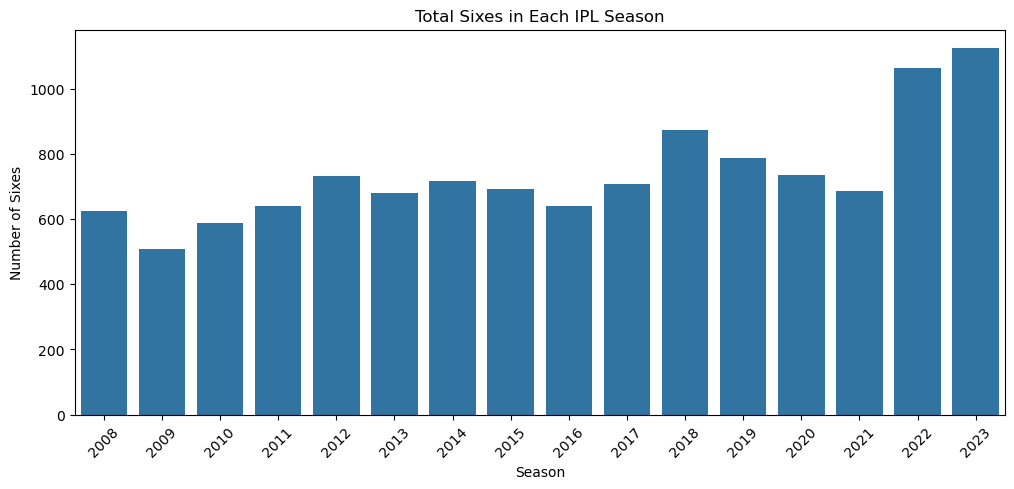

In [12]:
sixes_per_season = df[df['runs_off_bat'] == 6].groupby("season")["runs_off_bat"].count().reset_index()
sixes_per_season.rename(columns={"runs_off_bat": "total_sixes"}, inplace=True)

print("🏏 Total Sixes in Each IPL Season:")
print(sixes_per_season)

plt.figure(figsize=(12, 5))
sns.barplot(x=sixes_per_season["season"], y=sixes_per_season["total_sixes"])
plt.title("Total Sixes in Each IPL Season")
plt.xlabel("Season")
plt.ylabel("Number of Sixes")
plt.xticks(rotation=45)
plt.show()

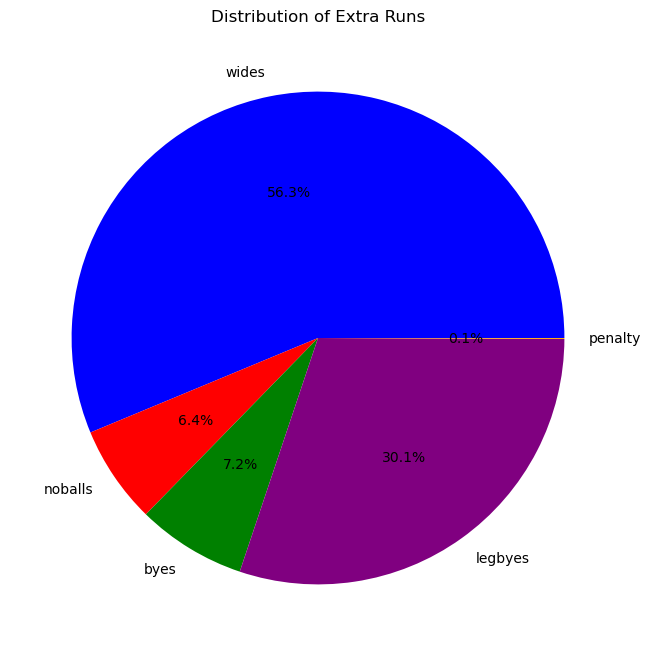

In [13]:
extras = df[['wides', 'noballs', 'byes', 'legbyes', 'penalty']].sum()

plt.figure(figsize=(8, 8))
plt.pie(extras, labels=extras.index, autopct='%1.1f%%', colors=['blue', 'red', 'green', 'purple', 'orange'])
plt.title("Distribution of Extra Runs")
plt.show()

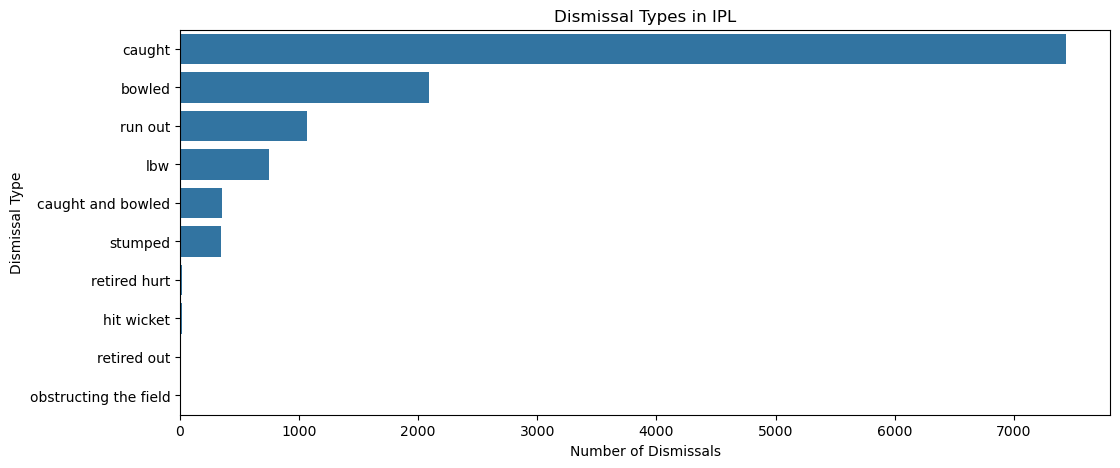

In [14]:
dismissals = df['wicket_type'].dropna().value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(x=dismissals.values, y=dismissals.index)
plt.title("Dismissal Types in IPL")
plt.xlabel("Number of Dismissals")
plt.ylabel("Dismissal Type")
plt.show()

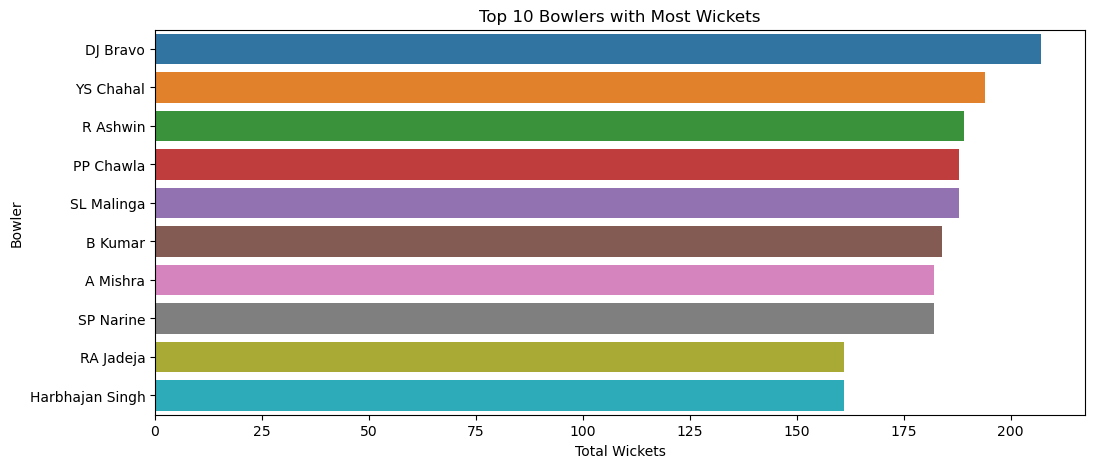

In [15]:
# Most Wickets Taken by Bowlers
bowler_wickets = df[df['wicket_type'] != "Unknown"].groupby('bowler')['wicket_type'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(
    x=bowler_wickets.values, 
    y=bowler_wickets.index, 
    hue=bowler_wickets.index,  
    legend=False
)

plt.title('Top 10 Bowlers with Most Wickets')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

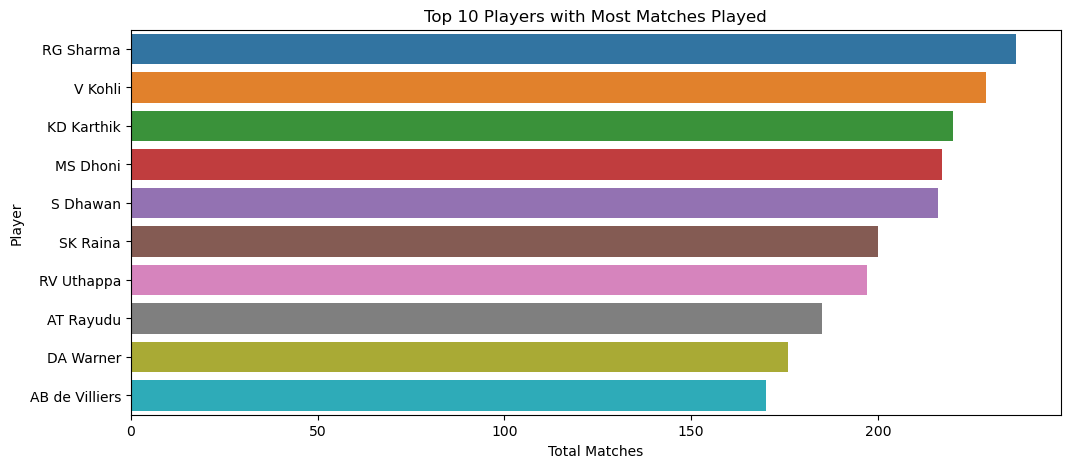

In [16]:
player_matches = df.groupby('striker')['match_id'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(
    x=player_matches.values, 
    y=player_matches.index, 
    hue=player_matches.index,  
    legend=False
)

plt.title('Top 10 Players with Most Matches Played')
plt.xlabel('Total Matches')
plt.ylabel('Player')
plt.show()

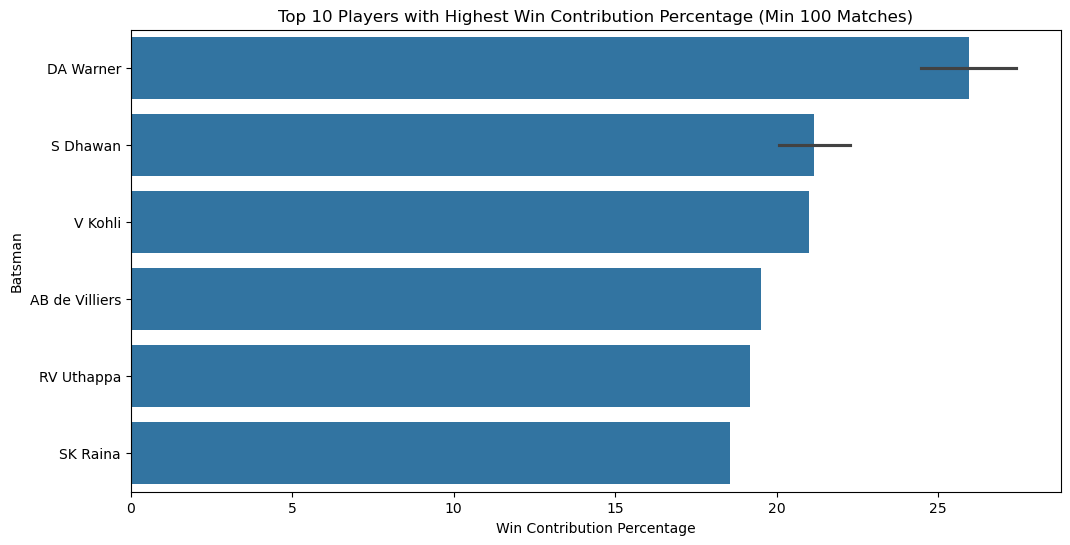

Univariate analysis on ball-by-ball data completed with win contribution analysis for players with a minimum of 100 matches!


In [17]:
def win_contribution(df):
    match_wise_runs = df.groupby(['match_id', 'batting_team', 'striker'])['runs_off_bat'].sum().reset_index()
    team_total_runs = df.groupby(['match_id', 'batting_team'])['runs_off_bat'].sum().reset_index()
    contribution = match_wise_runs.merge(team_total_runs, on=['match_id', 'batting_team'], suffixes=('_player', '_team'))
    contribution['contribution_percent'] = (contribution['runs_off_bat_player'] / contribution['runs_off_bat_team']) * 100
    return contribution

batsman_contribution = win_contribution(df)
batsman_contribution = batsman_contribution[batsman_contribution['striker'].isin(player_matches.index)]
team_contribution_avg = batsman_contribution.groupby(['batting_team', 'striker'])['contribution_percent'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    x=team_contribution_avg['contribution_percent'].head(10), 
    y=team_contribution_avg['striker'].head(10)
)

plt.title('Top 10 Players with Highest Win Contribution Percentage (Min 100 Matches)')
plt.xlabel('Win Contribution Percentage')
plt.ylabel('Batsman')
plt.show()

print("Univariate analysis on ball-by-ball data completed with win contribution analysis for players with a minimum of 100 matches!")


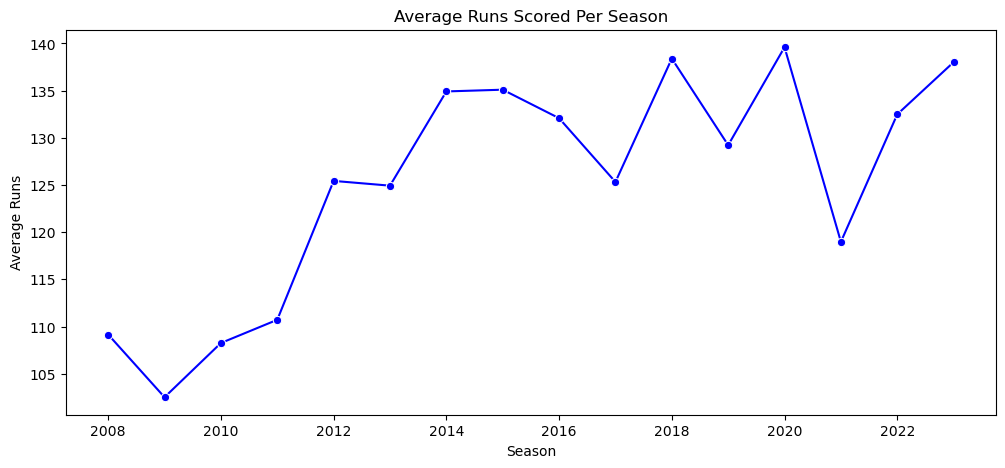

In [18]:
# Average IPL Season Runs & Highest Run Scorer (Orange Cap)
season_runs = df.groupby(['season', 'striker'])['runs_off_bat'].sum().reset_index()
highest_scorers = season_runs.loc[season_runs.groupby('season')['runs_off_bat'].idxmax()]
average_season_runs = season_runs.groupby('season')['runs_off_bat'].mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=average_season_runs.index, y=average_season_runs.values, marker='o', color='b')
plt.title('Average Runs Scored Per Season')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.show()

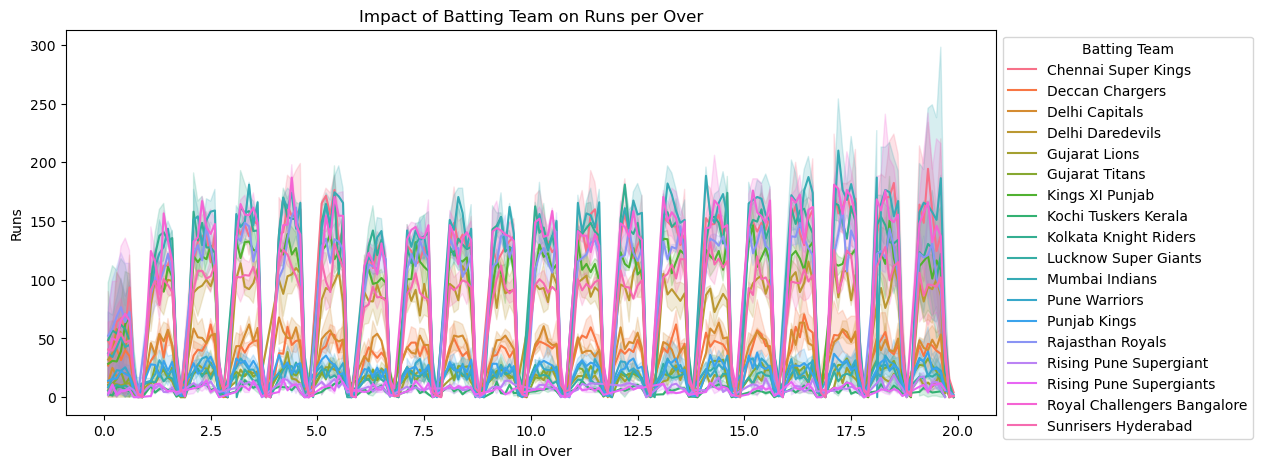

In [31]:
# Impact of Batting Team on Runs per Over
runs_per_over = df.groupby(["batting_team", "innings", "ball"])["runs_off_bat"].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x=runs_per_over["ball"], y=runs_per_over["runs_off_bat"], hue=runs_per_over["batting_team"])
plt.title("Impact of Batting Team on Runs per Over")
plt.xlabel("Ball in Over")
plt.ylabel("Runs")
plt.legend(title="Batting Team", bbox_to_anchor=(1, 1))
plt.show()

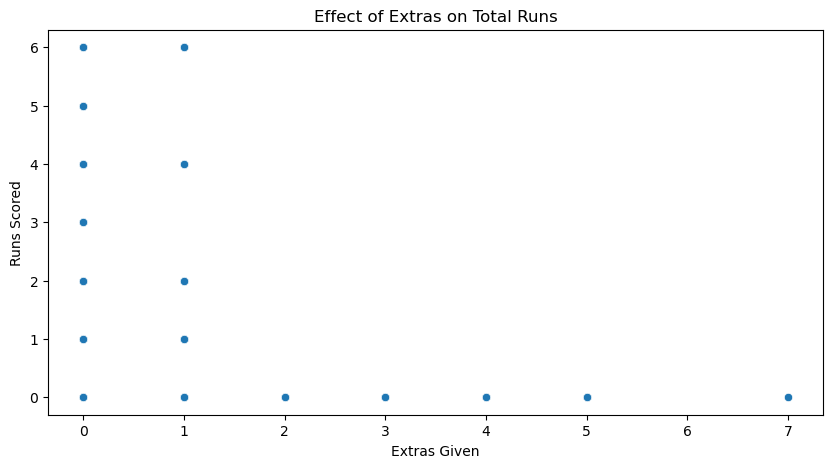

In [20]:
# How Extras Affect Total Runs?
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["extras"], y=df["runs_off_bat"])
plt.title("Effect of Extras on Total Runs")
plt.xlabel("Extras Given")
plt.ylabel("Runs Scored")
plt.show()

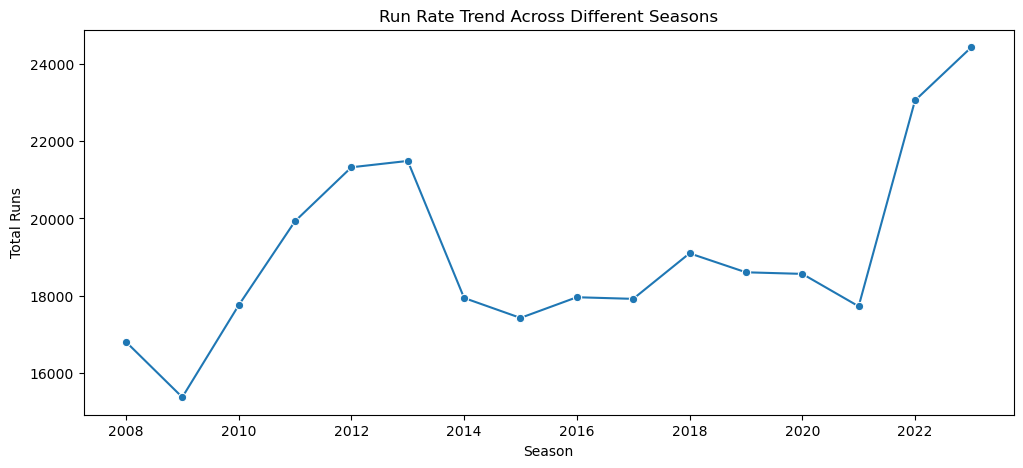

In [21]:
# Run Rate Trend Across Different Seasons
runs_per_season = df.groupby("season")["runs_off_bat"].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x=runs_per_season["season"], y=runs_per_season["runs_off_bat"], marker="o")
plt.title("Run Rate Trend Across Different Seasons")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.show()

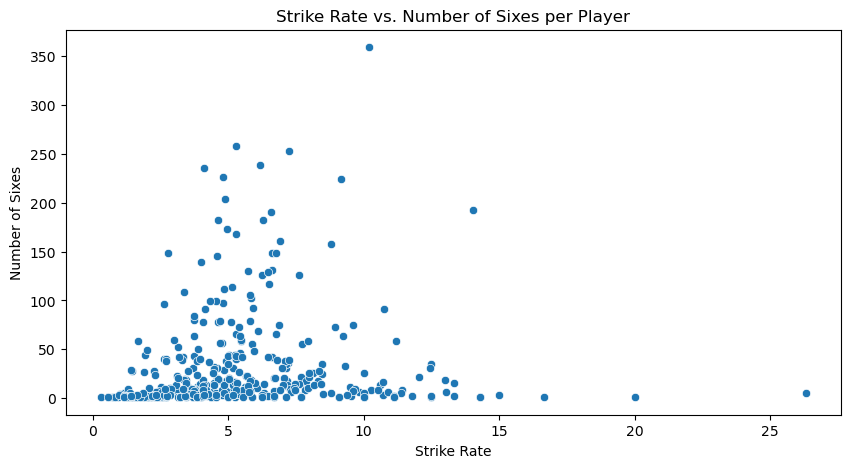

In [22]:
# Strike Rate vs. Number of Sixes per Player
player_sixes = df[df["runs_off_bat"] == 6].groupby("striker")["runs_off_bat"].count().reset_index()
player_balls = df.groupby("striker")["ball"].count().reset_index()
player_data = pd.merge(player_sixes, player_balls, on="striker", how="inner")
player_data["strike_rate"] = (player_data["runs_off_bat"] / player_data["ball"]) * 100

plt.figure(figsize=(10, 5))
sns.scatterplot(x=player_data["strike_rate"], y=player_data["runs_off_bat"])
plt.title("Strike Rate vs. Number of Sixes per Player")
plt.xlabel("Strike Rate")
plt.ylabel("Number of Sixes")
plt.show()

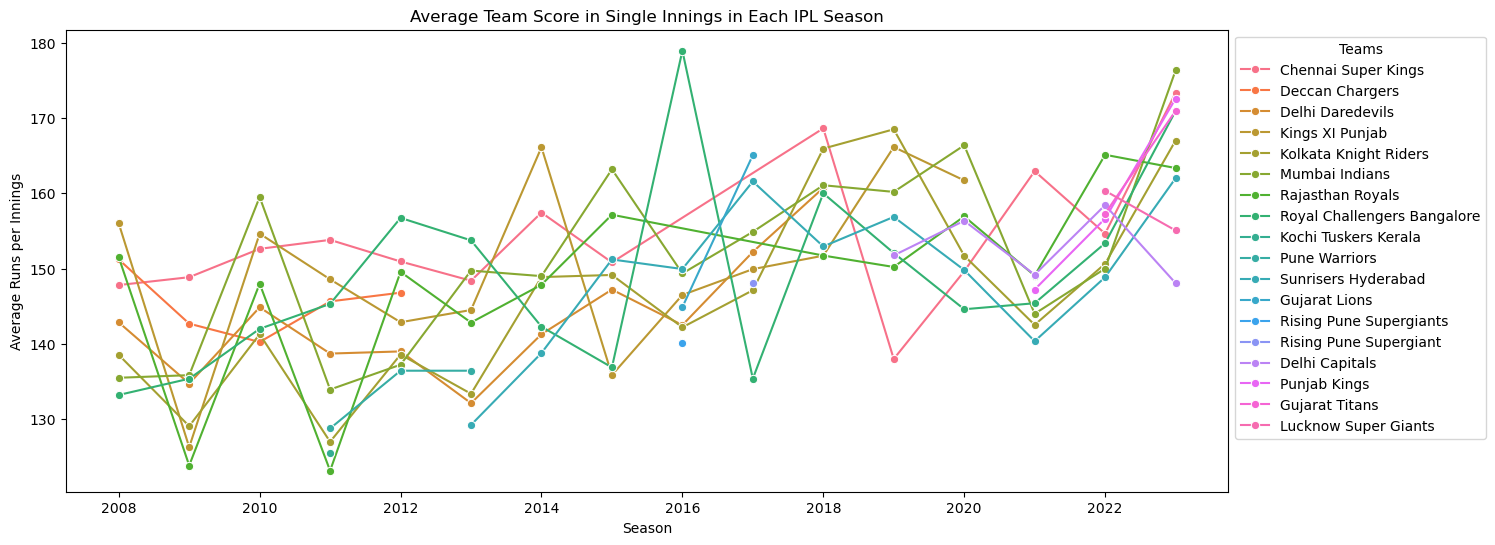


Average Team Score in Single Innings in Each IPL Season:
     season                 batting_team  runs_off_bat
0      2008          Chennai Super Kings    147.812500
1      2008              Deccan Chargers    151.214286
2      2008             Delhi Daredevils    142.857143
3      2008              Kings XI Punjab    156.000000
4      2008        Kolkata Knight Riders    138.538462
..      ...                          ...           ...
131    2023               Mumbai Indians    176.312500
132    2023                 Punjab Kings    172.571429
133    2023             Rajasthan Royals    163.357143
134    2023  Royal Challengers Bangalore    170.928571
135    2023          Sunrisers Hyderabad    162.000000

[136 rows x 3 columns]


In [23]:

# Average Team Score in Single Innings in Each IPL Season
team_innings_avg = df.groupby(['season', 'match_id', 'batting_team'])['runs_off_bat'].sum().groupby(['season', 'batting_team']).mean().reset_index()

plt.figure(figsize=(15,6))
sns.lineplot(data=team_innings_avg, x='season', y='runs_off_bat', hue='batting_team', marker='o')
plt.title('Average Team Score in Single Innings in Each IPL Season')
plt.xlabel('Season')
plt.ylabel('Average Runs per Innings')
plt.legend(title='Teams', bbox_to_anchor=(1,1))
plt.show()

print("\nAverage Team Score in Single Innings in Each IPL Season:")
print(team_innings_avg)

In [24]:
# Strike Rate vs. Number of Sixes per Player
player_sixes = df[df["runs_off_bat"] == 6].groupby("striker")["runs_off_bat"].count().reset_index()
player_balls = df.groupby("striker")["ball"].count().reset_index()
player_data = pd.merge(player_sixes, player_balls, on="striker", how="inner")
player_data["strike_rate"] = (player_data["runs_off_bat"] / player_data["ball"])

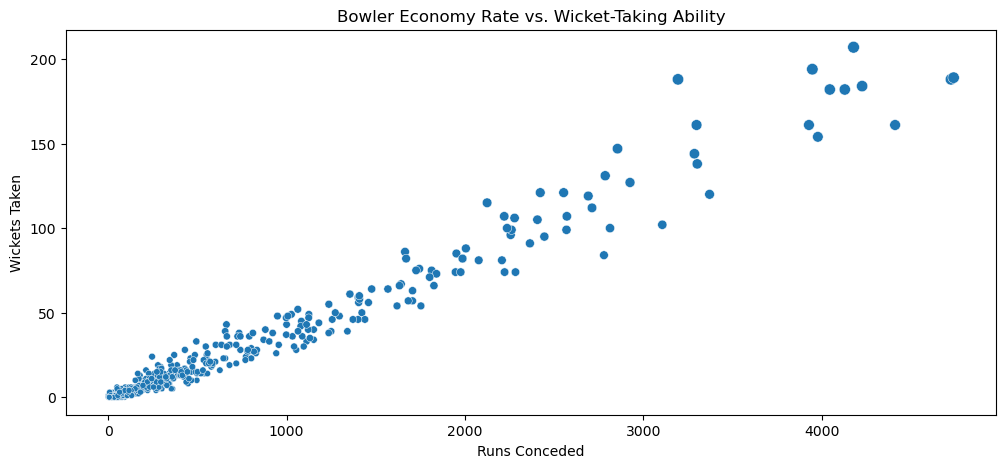

In [25]:
# Bowler Economy Rate vs. Wicket-Taking Ability
bowler_stats = df.groupby("bowler").agg({"runs_off_bat": "sum", "wicket_type": "count"}).reset_index()
plt.figure(figsize=(12, 5))
sns.scatterplot(x=bowler_stats["runs_off_bat"], y=bowler_stats["wicket_type"], size=bowler_stats["wicket_type"], legend=False)
plt.title("Bowler Economy Rate vs. Wicket-Taking Ability")
plt.xlabel("Runs Conceded")
plt.ylabel("Wickets Taken")
plt.show()

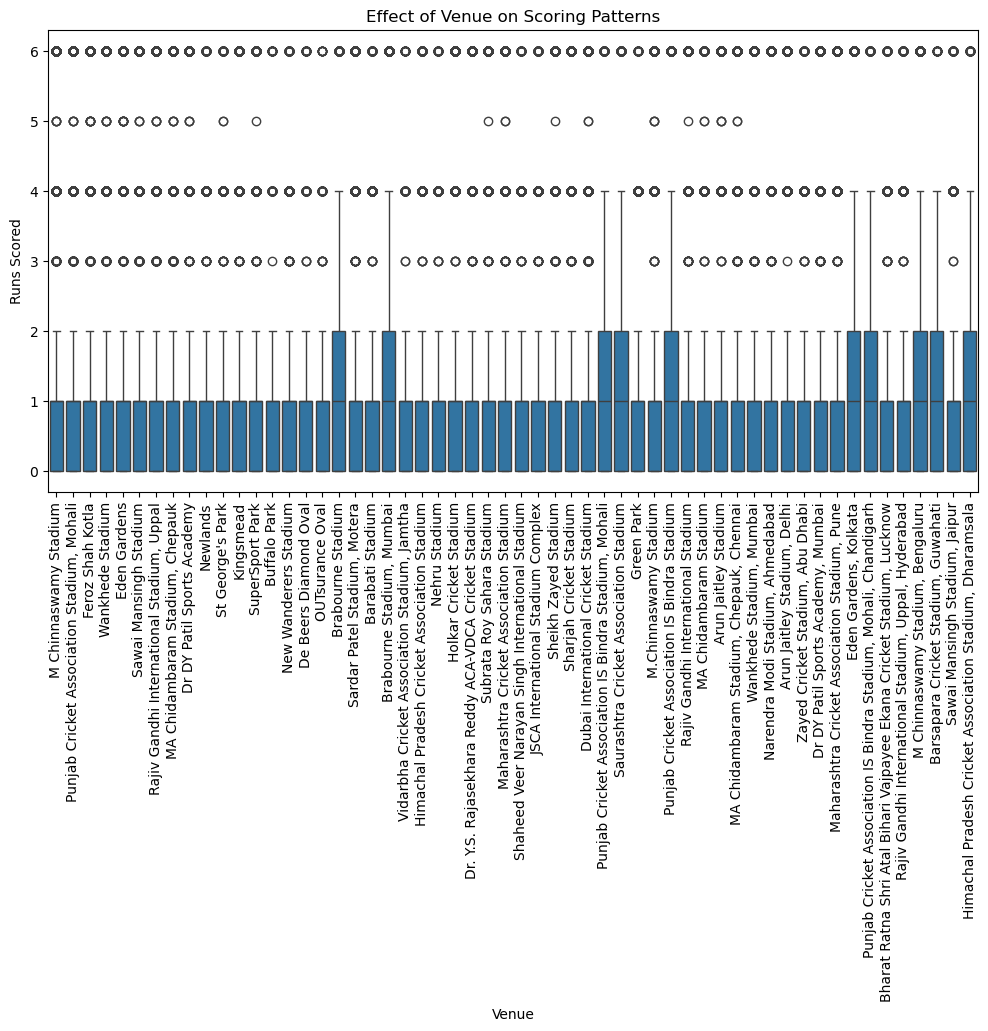

In [26]:
# Effect of Venue on Scoring Patterns
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["venue"], y=df["runs_off_bat"])
plt.xticks(rotation=90)
plt.title("Effect of Venue on Scoring Patterns")
plt.xlabel("Venue")
plt.ylabel("Runs Scored")
plt.show()

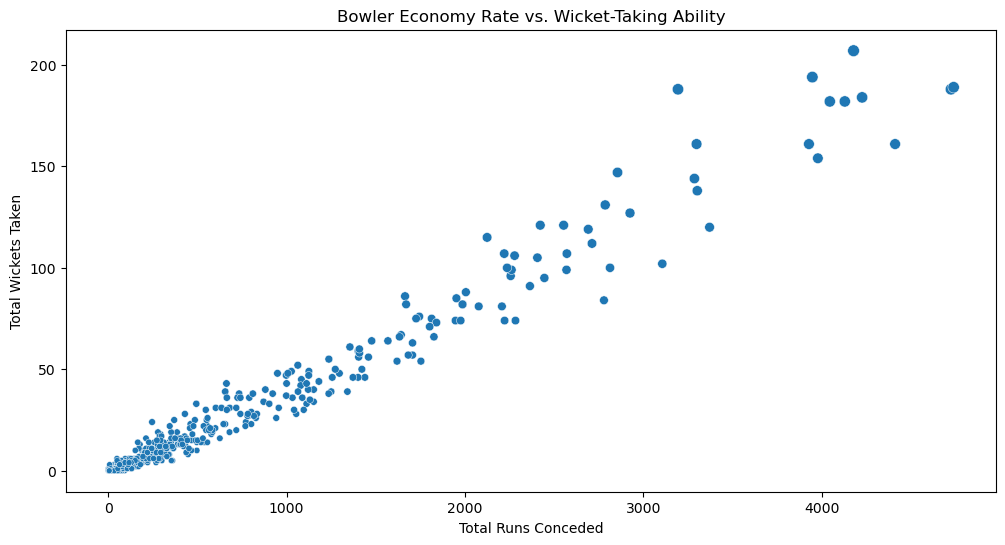

In [27]:
bowler_stats = df.groupby("bowler").agg({"runs_off_bat": "sum", "wicket_type": "count"}).reset_index()
bowler_stats.rename(columns={"runs_off_bat": "total_runs", "wicket_type": "total_wickets"}, inplace=True)

plt.figure(figsize=(12, 6))
sns.scatterplot(x="total_runs", y="total_wickets", size="total_wickets", data=bowler_stats, legend=False)
plt.title("Bowler Economy Rate vs. Wicket-Taking Ability")
plt.xlabel("Total Runs Conceded")
plt.ylabel("Total Wickets Taken")
plt.show()


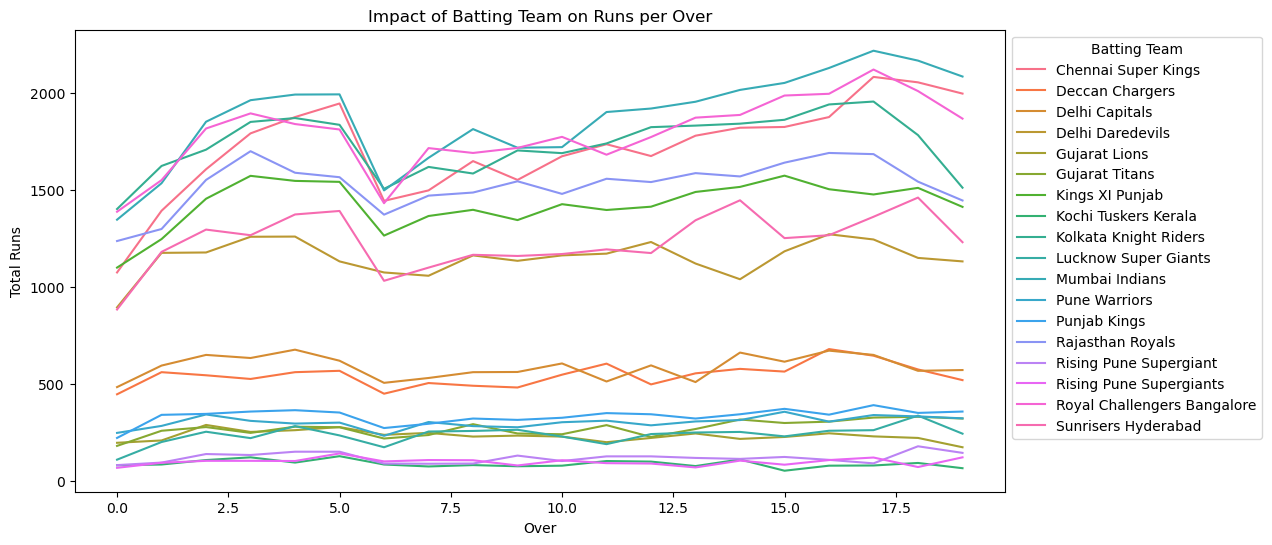

In [28]:
df["over"] = df["ball"].astype(int) 
runs_per_over = df.groupby(["batting_team", "over"])["runs_off_bat"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="over", y="runs_off_bat", hue="batting_team", data=runs_per_over)
plt.title("Impact of Batting Team on Runs per Over")
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.legend(title="Batting Team", bbox_to_anchor=(1, 1))
plt.show()

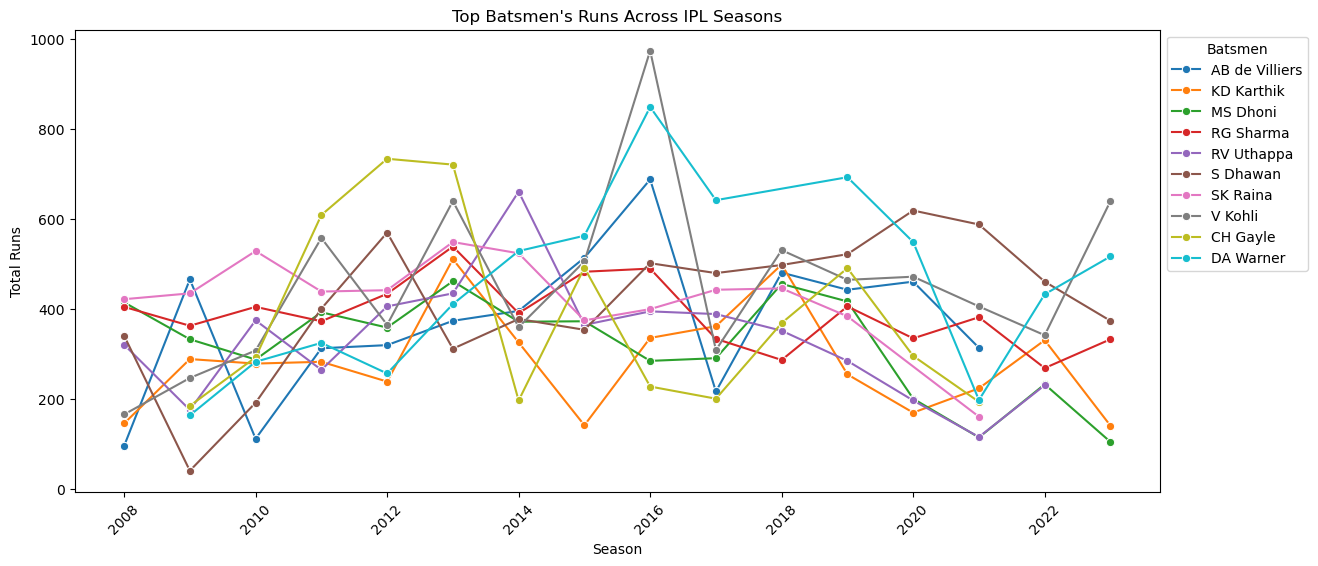

In [29]:
batsman_runs = df.groupby(["season", "striker"])["runs_off_bat"].sum().reset_index()

top_batsmen = batsman_runs.groupby("striker")["runs_off_bat"].sum().nlargest(10).index

filtered_data = batsman_runs[batsman_runs["striker"].isin(top_batsmen)]

plt.figure(figsize=(14, 6))
sns.lineplot(x="season", y="runs_off_bat", hue="striker", data=filtered_data, marker="o")
plt.title("Top Batsmen's Runs Across IPL Seasons")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.legend(title="Batsmen", bbox_to_anchor=(1, 1))
plt.show()

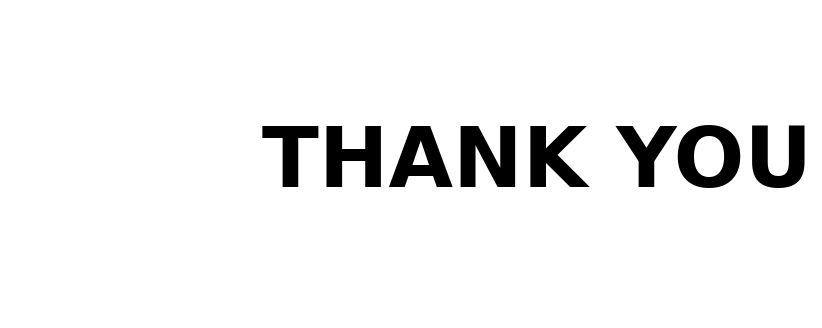

In [41]:
plt.figure(figsize=(8, 4))
plt.text(0.85, 0.5, "THANK YOU", fontsize=60, ha='center', va='center', fontweight='bold')
plt.axis("off")  
plt.show()
